In [137]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import json
import math
%matplotlib inline

There are two leagues in Major League Baseball, the **American League** and the **National League**. Some people have the assumption that the AL has better starting pitching than the NL.

We can use *Wins Above Replacement* (shortened to WAR), a summary statistic for pitchers (and batters) in baseball, to assert whether this claim is true or not. The higher the WAR for a given pitcher, the better.

Below we'll load in a JSON file that has the WAR statistic for 455 pitchers in the AL and 425 pitchers in the NL.

In [138]:
with open('data/baseball_WARs.json', 'r') as fp:
    baseball_WARs = json.load(fp)

We can load in the JSON file into a dictionary that has two lists, named NL and AL. Each list contains all of the WAR values for all of the pitchers in either league in the 2019 season.

In [139]:
[print(i) for i in baseball_WARs]

AL
NL


[None, None]

1. Show the histograms and boxplots for each of the leagues. What do each of the distributions look like? Are there outliers? Can we assume each of the distributions is normal?

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2a1f16d8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2a231b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2a231080>,
 'medians': [<matplotlib.lines.Line2D at 0x1a2a231f28>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a2a23e518>,
 'means': []}

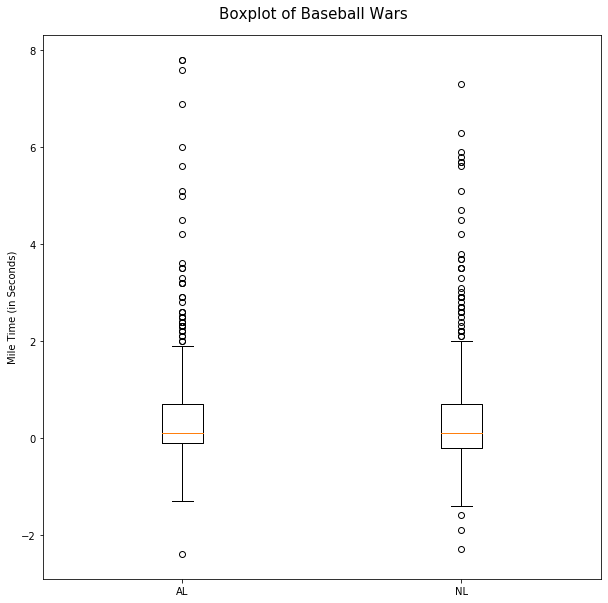

In [140]:
fig = plt.figure(figsize=(10,10))
plt.ylabel('Mile Time (in Seconds)')
fig.suptitle('Boxplot of Baseball Wars', fontsize=15, y=0.92)
plt.boxplot([baseball_WARs["AL"], baseball_WARs["NL"]], labels=['AL', 'NL'])

([array([  1.,  64., 271.,  64.,  35.,  10.,   2.,   3.,   1.,   4.]),
  array([  4.,  74., 232.,  61.,  26.,  16.,   4.,   4.,   3.,   1.])],
 array([-2.4 , -1.38, -0.36,  0.66,  1.68,  2.7 ,  3.72,  4.74,  5.76,
         6.78,  7.8 ]),
 <a list of 2 Lists of Patches objects>)

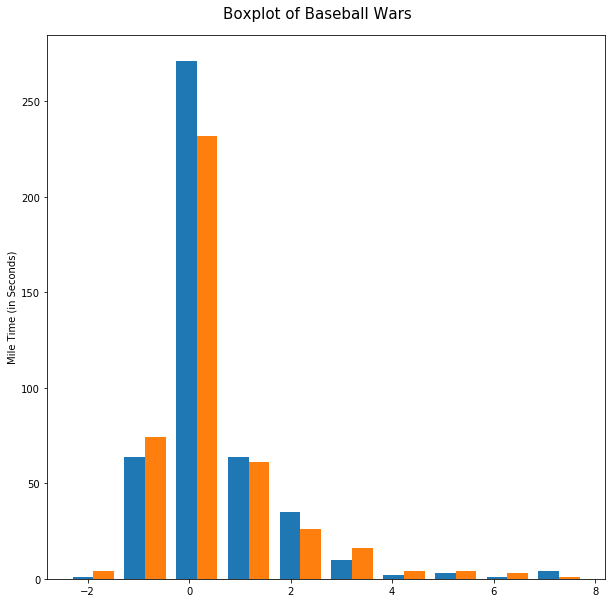

In [141]:
fig = plt.figure(figsize=(10,10))
plt.ylabel('Mile Time (in Seconds)')
fig.suptitle('Boxplot of Baseball Wars', fontsize=15, y=0.92)
plt.hist([baseball_WARs["AL"], baseball_WARs["NL"]])

There are a lot of outliers according to the boxplot. According to the histogram, we cannot assume that the distribution is normal. It does seem as if AL and NL have values close to each other.

2. Say that we want to first see if the average WAR in each of the leagues is the same, or are *different* from each other. In this case, what is our null hypothesis and our alternate hypothesis?

Null hypothesis is that the average WAR in each of the leagues is the same. The alternate hypothesis is that they aren't the same.

3. Using the pooled variance function below, find the pooled variance and pooled standard deviation of the two leagues.

In [142]:
def custom_pooled_variance(a, b):
    return ((((len(a) - 1) * np.var(a, ddof=1)) + ((len(b) - 1) * np.var(b, ddof=1))) / (len(a) + len(b) - 2)) * ((1/len(a)) + 1/len(b))

In [143]:
pooled_var = custom_pooled_variance(baseball_WARs["AL"], baseball_WARs["NL"])
print("Pooled variance of the two leagues is ", pooled_var, 2)

Pooled variance of the two leagues is  0.006954559017696421 2


In [144]:
print(math.sqrt(custom_pooled_variance(baseball_WARs["AL"], baseball_WARs["NL"])))

0.08339399869113137


4. Find the proper parameters for the T-distribution to test our null hypothesis. What is the mean, standard deviation, and degrees of freedom of our null hypothesis?

In [145]:
df = len(baseball_WARs["AL"]) + len(baseball_WARs["NL"]) - 2
print("The degrees of freedom is", df)

The degrees of freedom is 878


In [146]:
diff = np.mean(baseball_WARs["AL"]) - np.mean(baseball_WARs["NL"])
print("The mean is", mn)                                           

The mean is 0.013437621202327055


In [147]:
print('Pooled Standard Deviation:', np.sqrt(pooled_var))

Pooled Standard Deviation: 0.08339399869113137


5. At a signifiance level of 0.05, what are the rejection regions of our distribution? Make a plot highlighting these rejection regions in red.

In [148]:
dist.ppf(0.0025)

0.0449413389572492

In [149]:
dist.ppf(0.975)

9.348403604496148

Rejection Region: Less than -0.16
Rejection Region: Greater than 0.16


Text(0.5, 0.92, 'T-Distribution of Difference Between AL AND NL')

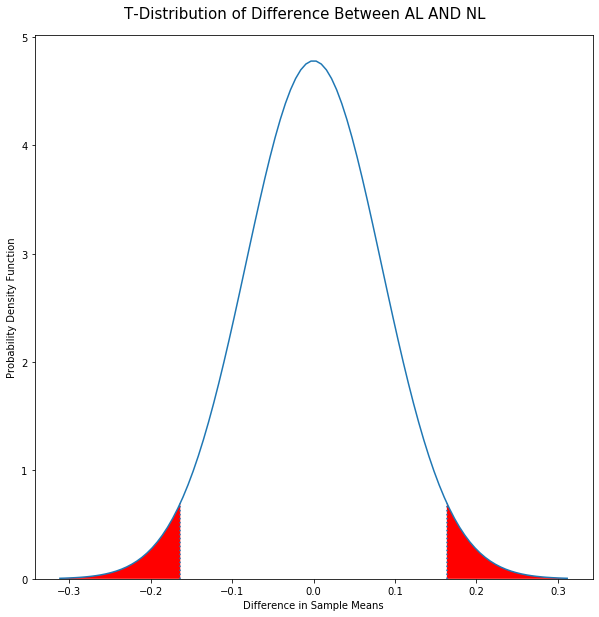

In [150]:
dist = stats.t(loc=0, scale=np.sqrt(pooled_var), df=878)
print('Rejection Region: Less than', np.round(dist.ppf(0.025), 2))
print('Rejection Region: Greater than', np.round(dist.ppf(0.975), 2))
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.plot([dist.ppf(0.025), dist.ppf(0.025)],[0, dist.pdf(dist.ppf(0.025))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.0001), dist.ppf(0.025))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.plot([dist.ppf(0.975), dist.ppf(0.975)],[0, dist.pdf(dist.ppf(0.975))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.975), dist.ppf(0.9999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Difference in Sample Means')
plt.ylabel('Probability Density Function')
fig.suptitle('T-Distribution of Difference Between AL AND NL', fontsize=15, y=0.92)

6. What is the mean difference in WAR between the two leagues (compute AL minus NL)?

In [151]:
diff = np.mean(baseball_WARs["AL"]) - np.mean(baseball_WARs["NL"])
print(diff)

0.013437621202327055


7. Given that we are doing a two-sided test, can we reject the null hypothesis here? What is the p-value of our observed difference?

In [152]:
stats.t(loc=0, scale=np.sqrt(pooled_var), df=878).cdf(0.013437621202327055) * 2

1.1279751887262526

Yes, we can reject the null hypothesis here because the p-value is greater than our significance level.

8. Given that the original assertion was that the AL has **better** pitching than the NL, state the new null and alternate hypotheses for this test.

Null hypothesis is that AL has better pitching than the NL. The alternate hypothesis is that they do not have better pitching.

9. At a signifiance level of 0.05, what is the new rejection region of our distribution? Make a plot highlighting this rejection region in red.

Rejection Region: Less than 0.14


Text(0.5, 0.92, 'T-Distribution of Difference Between AL AND NL')

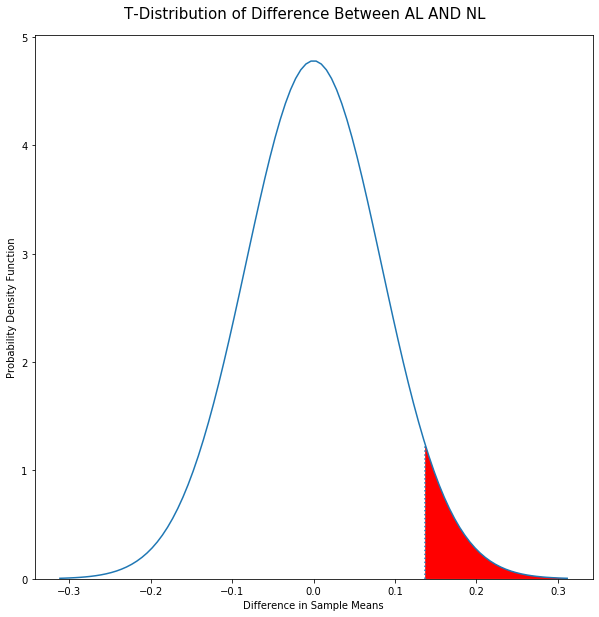

In [153]:
dist = stats.t(loc=0, scale=np.sqrt(pooled_var), df=878)
print('Rejection Region: Less than', np.round(dist.ppf(0.95), 2))
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.plot([dist.ppf(0.95), dist.ppf(0.95)],[0, dist.pdf(dist.ppf(0.95))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.95), dist.ppf(0.9999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Difference in Sample Means')
plt.ylabel('Probability Density Function')
fig.suptitle('T-Distribution of Difference Between AL AND NL', fontsize=15, y=0.92)

10. Given that we are doing a one-sided test, can we reject the null hypothesis here? What is the p-value of our observed difference?

In [154]:
stats.t(loc=0, scale=np.sqrt(pooled_var), df=878).cdf(0.013437621202327055)

0.5639875943631263

The p-value of our observed difference is 0.5639875943631263. Because of this, no we cannot reject the null hypothesis here. 

11. As you (hopefully) observed, the underlying distributions are skewed, which means that they technically violate the underlying assumption of normality for a two-sided T-test.

To address this, do a bootstrap test with 10,000 samples using the method we did in class. Use a random seed of 42 and graph the results (again, compute AL minus NL)

In [155]:
np.random.seed(42)
diff = []
for i in range(10000):
    total = baseball_WARs["AL"] + baseball_WARs["NL"]
    np.random.shuffle(total)
    new_a = total[:len(baseball_WARs["AL"])]
    new_b = total[len( baseball_WARs["NL"]):]
    diff.append(np.mean(new_b) - np.mean(new_a))

Text(0.5, 0.92, 'Bootstrap Distribution of Difference Between Samples')

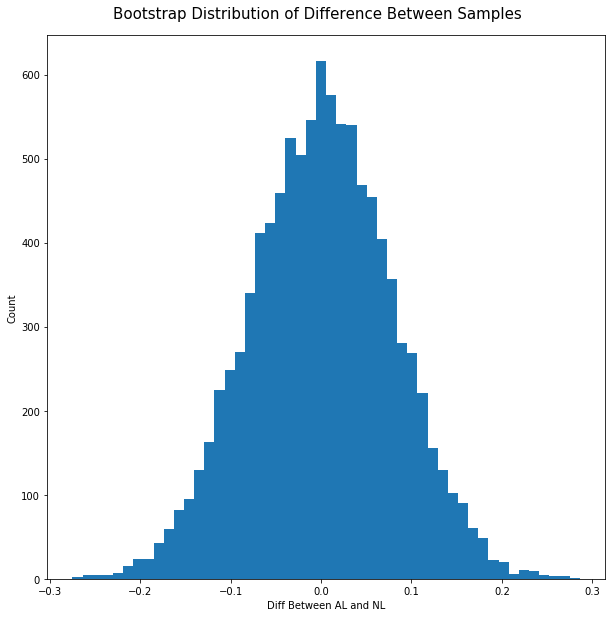

In [156]:
fig = plt.figure(figsize=(10,10))
plt.hist(diff, bins=50)
plt.xlabel('Diff Between AL and NL')
plt.ylabel('Count')
fig.suptitle('Bootstrap Distribution of Difference Between Samples', fontsize=15, y=0.92)

12. For a one-sided test at a signifiance level of 0.05, calculate the rejection region of this distribution.

In [157]:
np.percentile(diff, 5)

-0.12836263736263745

13. What is the p-value of our observed difference?

In [158]:
stats.percentileofscore(diff, 0.013437621202327055)

56.35

BONUS: Say that someone claims to have found a long-lost work by Shakespeare. We want to try and verify if this work is by Shakespeare by comparing the frequency of common words to see if the relative frequencies are similar to what Shakespeare would have written.

|Word |  a |an | this  | that |
|---|---|---| --- | --- |
|King Lear   |  150|  30 | 30 | 90
| Lost Work  |  90 |  20 | 10 | 80

14. Run a Chi-Squared contingency test on this data to see if these two works could conceivably come from the same distribution. Can we reject the null hypothesis at a significance level of 0.05?

Rejection Region: Greater than 7.81


Text(0.5, 0.92, 'Chi-Square Distribution with 10 Degrees of Freedom')

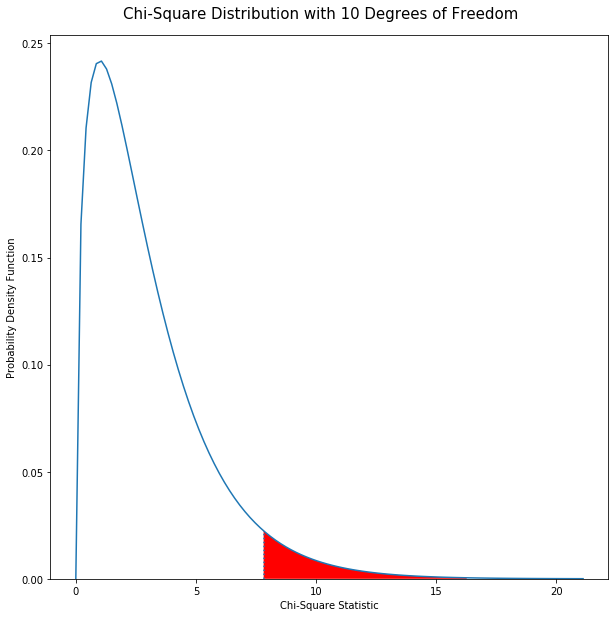

In [159]:
dist = stats.chi2(df=3)
print('Rejection Region: Greater than', np.round(dist.ppf(0.95), 2))
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.plot([dist.ppf(0.95), dist.ppf(0.95)],[0, dist.pdf(dist.ppf(0.95))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.95), dist.ppf(0.999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Chi-Square Statistic')
plt.ylabel('Probability Density Function')
fig.suptitle('Chi-Square Distribution with 10 Degrees of Freedom', fontsize=15, y=0.92)

15. How many degrees of freedom are there in the Chi-Squared distribution?

There are three degrees of freedom in the Chi-Squared distribution.

16. Given the number of degrees of freedom, at what level can we reject the n ull hypothesis?

In [160]:
stats.chi2(df=3).ppf(0.95)

7.814727903251179

We can reject the null hypothesis at a level of 7.814727903251179.